KNN Analysis of May 2021 Divvy Data

In [ ]:
# import packages
import pandas as pd
import sklearn.neighbors as NN
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import datetime
import re
import sklearn.metrics as metrics

In [11]:
# import data
input_data = pd.read_csv(r"C:\Users\HP\Documents\GitHub\CS-396-Divvy-Bikes\Data\202105-divvy-tripdata.csv")

Create Data For Distance and Duration

In [65]:
# takes two strings as inputs and outputs a datetime.timeDelta object
def subtractTime(startStr, endStr):
    startVec = re.split(r'\D+', startStr)
    endVec = re.split(r'\D+', endStr)
    for i in range(5):
        startVec[i] = int(startVec[i])
        endVec[i] = int(endVec[i])
    start = datetime.datetime(startVec[2], startVec[0], startVec[1], startVec[3], startVec[4])
    end = datetime.datetime(endVec[2], endVec[0], endVec[1], endVec[3], endVec[4])
    duration = end-start
    return duration

In [66]:
membership = input_data.loc[:, 'member_casual']
start_time = input_data.loc[:, 'started_at']
end_time = input_data.loc[:, 'ended_at']
start_lat = input_data.loc[:, 'start_lat']
start_lon = input_data.loc[:, 'start_lng']
end_lat = input_data.loc[:, 'end_lat']
end_lon = input_data.loc[:, 'end_lng']

# find distance between the starting and ending stations
distance = np.hypot(end_lat - start_lat, end_lon - start_lon)

duration = np.ndarray(membership.size)
for i in range(membership.size):
    # find the duration between the start and end of the ride
    dur = subtractTime(start_time[i], end_time[i])
    duration[i] = dur.days*24*60 + dur.seconds/60

Create and test KNN model

In [86]:
# fit KNN model
X_train, X_test, y_train, y_test = train_test_split(np.column_stack([distance, duration]), membership, test_size = 0.20)
scores = []
max_k = 20
for k in range(1, max_k):
    model = NN.KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

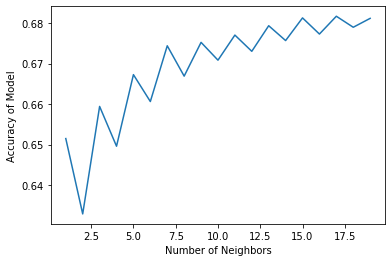

In [87]:
fig, ax = plt.subplots()
plt.plot(range(1, max_k), scores)
ax.set_xlabel("Number of Neighbors")
ax.set_ylabel("Accuracy of Model")
plt.show()